# Практическая работа №2: Исследование подгрупп сетей. Сети аффилированности.

Выполнилa студентка гр.0383 Рудакова Юлия. Вариант 64.

## Цель работы:

Овладеть навыками работы с математическими пакетами для исследования подгрупп в социальных сетях, а также моделирования, отображения и анализа сетей аффилированности.


## Основные теоретические положения
***Подгруппа*** - это любое подмножество акторов и все связи между ними.

***n-клика*** - максимальный подграф, в котором наибольшее геодезическое расстояние

***n-клан*** - это n-клика, в которой геодезическое расстояние между всеми узлами в подграфе не превышает n для путей внутри подграфа.

***n-клубы*** - максимальный подграф диаметра меньше либо равного n.

***k-ядро*** - это максимальный подграф, в котором каждая вершина связана минимум с k другими вершинами этого же подграфа.

***k-плекс*** - это максимальный подграф, содержащий $g_s$ узлов, в котором каждый узел смежен не менее с чем с $(g_s - k)$ узлами подграфа:

$$d_s(i) \geq g_s - k, \forall n \in N_s$$

***Сеть*** - объект, представляющий собой совокупность конечного набора (или наборов) акторов и отношения (или отношений), определенных на них.

***Матрица инцидентности*** - мактрица I размерности g*L, описывающая какие линии каким узлом инцидентны.

***Биграф*** (двудольный граф) - это граф, множество вершин которого можно разбить на две части таким образом, что каждое ребро графа соединяет вершину из одной части с какой-то вершиной другой части, то есть не существует рёбер между вершинами одной и той же части графа. 

***Гиперграф*** - обобщение понятия графа; гиперграф состоит из множества объектов и множества подмножества объектов, в котором каждый объект принадлежит хотя бы одному подмножеству, причем ни одно подмножество не является пустым.

H(A,B), где A - множество объектов, B - множество ребер.

***Двойственный гиперграф*** для гиперграфа H(A,B) H*(B,A), где  B - множество объектов A.

***Сеть аффилированности*** - сеть, в которой участники аффилированны друг с другом на основе сотрудничества в рамках какой-то группы или совместного участия в определенном событии.

***Диаметр*** - наибольшая длина любого из кротчайших путей между всеми парами узлов.

***Матрица соучастия акторов***:
$$X^N = \{x_{ij}^N\}$$

$$x_{ij}^N = \sum_{k=1}^ha_{ik}a_{jk}$$

$$X^N = AA^T$$

***Матрица перекрытия событий***:
$$X^M = \{x_{kl}^M\}$$

$$x_{kl}^M = \sum_{i=1}^ga_{ik}a_{il}$$

$$X^M = A^TA$$


***Клика уровня c*** - максимальный полный подграф из 3 или более узлов, все из которыз являются смежными на уровне c, т.е. между всеми парами узлов есть ребра со значениями большими или равными c.

## Постановка задачи
С помощью математических пакетов и соответствующих библиотек провести анализ заданных социальных сетей на предмет подгрупп. Провести исследование сети 
аффилированности CEO. Полученные результаты содержательно проинтерпретировать.


## Выполнение работы

In [ ]:
if(!require('igraph')) {
        install.packages('igraph')
        library('igraph')
        
    }
if(!require('network')){
        install.packages('network')
        library('network')
}
if(!require('sna')){
        install.packages('sna')
        library('sna')
}
if(!require('intergraph')){
        install.packages('intergraph')
        library('intergraph')
}

if(!require('statnet')){
        install.packages('statnet')
        library('statnet')
}

Loading required package: igraph

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘igraph’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


Loading required package: network

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘network’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘coda’, ‘statnet.common’



‘network’ 1.18.0 (2022-10-05), part of the Statnet Project
* ‘news(package="network")’ for changes since last version
* ‘citation("network")’ for citation information
* ‘https://statnet.org’ for help, support, and other information



Attachin

1) Из файла florentine_business.csv (для нечётных вариантов) и файла florentine_marital.csv (для чётных вариантов) извлечь социоматрицу с помощью соответствующих функций. Отобразить сеть с помощью одного из алгоритмов укладки.


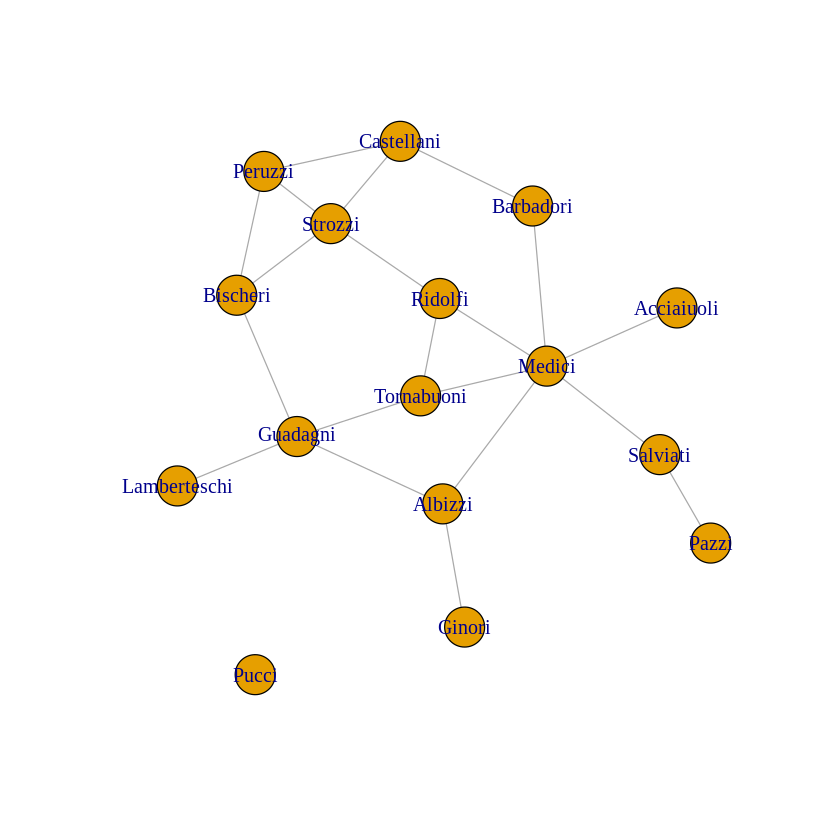

In [ ]:
florentine_marital <- read.table("./florentine_marital.csv", header = TRUE, sep=',')
rownames(florentine_marital) <- colnames(florentine_marital)
florentine_marital_net <- graph_from_adjacency_matrix(as.matrix(florentine_marital), mode = "undirected")
plot(florentine_marital_net, layout=layout_with_fr(florentine_marital_net))

2) Исследовать данную сеть на предмет подгрупп с помощью:
# n-клик

In [ ]:
florentine_m_g <- graph.adjacency(as.matrix(florentine_marital_net), mode="undirected")
prior <- 1
clique_len <- 2
cliques <-list()
while(clique_len > 1){
  cliques_cur <- max_cliques(connect(florentine_m_g, order=prior),min=3)
  cliques_cur<-lapply(cliques_cur, function(l) names(l))
  names(cliques_cur) <- rep(paste(prior,"klika",sep= "----"),times = length(cliques_cur))
  cliques <- c(cliques,cliques_cur)
  prior <- prior + 1
  clique_len <- length(cliques_cur)
}

cliques


Warning message in connect(florentine_m_g, order = prior):
“At core/operators/connect_neighborhood.c:77 : Order smaller than two, graph will be unchanged.”


$`1----klika`
[1] "Medici"     "Ridolfi"    "Tornabuoni"

$`1----klika`
[1] "Peruzzi"  "Strozzi"  "Bischeri"

$`1----klika`
[1] "Peruzzi"    "Strozzi"    "Castellani"

$`2----klika`
[1] "Pazzi"    "Medici"   "Salviati"

$`2----klika`
[1] "Ginori"   "Albizzi"  "Medici"   "Guadagni"

$`2----klika`
[1] "Lamberteschi" "Albizzi"      "Tornabuoni"   "Guadagni"     "Bischeri"    

$`2----klika`
[1] "Castellani" "Ridolfi"    "Strozzi"    "Medici"     "Barbadori" 

$`2----klika`
[1] "Castellani" "Ridolfi"    "Strozzi"    "Peruzzi"    "Barbadori" 

$`2----klika`
[1] "Castellani" "Ridolfi"    "Strozzi"    "Peruzzi"    "Bischeri"  

$`2----klika`
[1] "Guadagni" "Ridolfi"  "Peruzzi"  "Strozzi"  "Bischeri"

$`2----klika`
[1] "Guadagni"   "Ridolfi"    "Tornabuoni" "Albizzi"    "Bischeri"  

$`2----klika`
[1] "Guadagni"   "Ridolfi"    "Tornabuoni" "Albizzi"    "Medici"    

$`2----klika`
[1] "Guadagni"   "Ridolfi"    "Tornabuoni" "Strozzi"    "Bischeri"  

$`2----klika`
[1] "Guadagni"   "Ridolfi"    "Tornabuoni" "Strozzi"    "Medici"    

$`2----klika`
[1] "Medici"     "Barbadori"  "Tornabuoni" "Ridolfi"    "Salviati"  
[6] "Albizzi"    "Acciaiuoli"

$`2----klika`
[1] "Medici"     "Barbadori"  "Tornabuoni" "Ridolfi"    "Strozzi"   

$`3----klika`
[1] "Pazzi"      "Acciaiuoli" "Tornabuoni" "Salviati"   "Ridolfi"   
[6] "Medici"     "Barbadori"  "Albizzi"   

$`3----klika`
[1] "Barbadori"  "Albizzi"    "Tornabuoni" "Ridolfi"    "Medici"    
[6] "Guadagni"   "Ginori"     "Bischeri"  

$`3----klika`
[1] "Barbadori"  "Albizzi"    "Tornabuoni" "Ridolfi"    "Medici"    
[6] "Guadagni"   "Ginori"     "Salviati"   "Acciaiuoli"

$`3----klika`
 [1] "Barbadori"  "Albizzi"    "Tornabuoni" "Ridolfi"    "Medici"    
 [6] "Guadagni"   "Strozzi"    "Castellani" "Bischeri"   "Peruzzi"   

$`3----klika`
 [1] "Barbadori"  "Albizzi"    "Tornabuoni" "Ridolfi"    "Medici"    
 [6] "Guadagni"   "Strozzi"    "Castellani" "Salviati"   "Acciaiuoli"

$`3----klika`
[1] "Bischeri"     "Albizzi"      "Tornabuoni"   "Ridolfi"      "Medici"      
[6] "Guadagni"     "Lamberteschi" "Ginori"      

$`3----klika`
[1] "Bischeri"     "Albizzi"      "Tornabuoni"   "Ridolfi"      "Medici"      
[6] "Guadagni"     "Lamberteschi" "Strozzi"      "Peruzzi"     

$`4----klika`
 [1] "Pazzi"      "Acciaiuoli" "Tornabuoni" "Strozzi"    "Salviati"  
 [6] "Ridolfi"    "Medici"     "Guadagni"   "Ginori"     "Castellani"
[11] "Barbadori"  "Albizzi"   

$`4----klika`
 [1] "Barbadori"    "Acciaiuoli"   "Tornabuoni"   "Strozzi"      "Salviati"    
 [6] "Ridolfi"      "Peruzzi"      "Medici"       "Lamberteschi" "Guadagni"    
[11] "Ginori"       "Castellani"   "Bischeri"     "Albizzi"     

$`5----klika`
 [1] "Albizzi"      "Acciaiuoli"   "Tornabuoni"   "Strozzi"      "Salviati"    
 [6] "Ridolfi"      "Peruzzi"      "Pazzi"        "Medici"       "Lamberteschi"
[11] "Guadagni"     "Ginori"       "Castellani"   "Bischeri"     "Barbadori"

Вывод: 
5 клика максимальная и содержит все не изолированные вершины. 4 клика выделяет 2 группы, в которых разные только самые отдалённые вершины. 2 клика создаёт несколько независимых групп, которые не пересекаются между собой.

# n-кланы

In [ ]:
isKlan <- function(graph, clique, name){
  if(diameter(subgraph(graph,clique),directed = FALSE) > unlist(strsplit(name,"-"))[1]){
    return(FALSE)
  }
  return (TRUE)
}

clique_index <- sapply(1:length(cliques), function(l) isKlan(florentine_m_g,cliques[[l]],names(cliques)[l]))
names(cliques)<-sapply(names(cliques), function(l) paste(unlist(strsplit(l,"-"))[1],"----klan",sep = ""))
cliques[clique_index]

$`1----klan`
[1] "Medici"     "Ridolfi"    "Tornabuoni"

$`1----klan`
[1] "Peruzzi"  "Strozzi"  "Bischeri"

$`1----klan`
[1] "Peruzzi"    "Strozzi"    "Castellani"

$`2----klan`
[1] "Pazzi"    "Medici"   "Salviati"

$`2----klan`
[1] "Ginori"   "Albizzi"  "Medici"   "Guadagni"

$`2----klan`
[1] "Lamberteschi" "Albizzi"      "Tornabuoni"   "Guadagni"     "Bischeri"    

$`2----klan`
[1] "Castellani" "Ridolfi"    "Strozzi"    "Medici"     "Barbadori" 

$`2----klan`
[1] "Castellani" "Ridolfi"    "Strozzi"    "Peruzzi"    "Bischeri"  

$`2----klan`
[1] "Guadagni"   "Ridolfi"    "Tornabuoni" "Albizzi"    "Medici"    

$`2----klan`
[1] "Guadagni"   "Ridolfi"    "Tornabuoni" "Strozzi"    "Bischeri"  

$`2----klan`
[1] "Medici"     "Barbadori"  "Tornabuoni" "Ridolfi"    "Salviati"  
[6] "Albizzi"    "Acciaiuoli"

$`3----klan`
[1] "Pazzi"      "Acciaiuoli" "Tornabuoni" "Salviati"   "Ridolfi"   
[6] "Medici"     "Barbadori"  "Albizzi"   

$`3----klan`
[1] "Barbadori"  "Albizzi"    "Tornabuoni" "Ridolfi"    "Medici"    
[6] "Guadagni"   "Ginori"     "Salviati"   "Acciaiuoli"

$`3----klan`
 [1] "Barbadori"  "Albizzi"    "Tornabuoni" "Ridolfi"    "Medici"    
 [6] "Guadagni"   "Strozzi"    "Castellani" "Bischeri"   "Peruzzi"   

$`3----klan`
[1] "Bischeri"     "Albizzi"      "Tornabuoni"   "Ridolfi"      "Medici"      
[6] "Guadagni"     "Lamberteschi" "Ginori"      

$`3----klan`
[1] "Bischeri"     "Albizzi"      "Tornabuoni"   "Ridolfi"      "Medici"      
[6] "Guadagni"     "Lamberteschi" "Strozzi"      "Peruzzi"     

$`4----klan`
 [1] "Pazzi"      "Acciaiuoli" "Tornabuoni" "Strozzi"    "Salviati"  
 [6] "Ridolfi"    "Medici"     "Guadagni"   "Ginori"     "Castellani"
[11] "Barbadori"  "Albizzi"   

$`4----klan`
 [1] "Barbadori"    "Acciaiuoli"   "Tornabuoni"   "Strozzi"      "Salviati"    
 [6] "Ridolfi"      "Peruzzi"      "Medici"       "Lamberteschi" "Guadagni"    
[11] "Ginori"       "Castellani"   "Bischeri"     "Albizzi"     

$`5----klan`
 [1] "Albizzi"      "Acciaiuoli"   "Tornabuoni"   "Strozzi"      "Salviati"    
 [6] "Ridolfi"      "Peruzzi"      "Pazzi"        "Medici"       "Lamberteschi"
[11] "Guadagni"     "Ginori"       "Castellani"   "Bischeri"     "Barbadori"

Вывод:
5 клан максимальный и содержит все не изолированные вершины. В данном случае n-клан совпадает c n-кликой.

# k-ядер


In [ ]:
core_check <- coreness(florentine_m_g, mode= "all")
cores <-lapply(0:max(as.integer(core_check)), function(l) names(core_check)[which(as.integer(core_check) >= l)])
names(cores) <- sapply(1:length(cores), function(l) paste(l-1," core",sep= " ----"))

cores

$`0 ---- core`
 [1] "Acciaiuoli"   "Albizzi"      "Barbadori"    "Bischeri"     "Castellani"  
 [6] "Ginori"       "Guadagni"     "Lamberteschi" "Medici"       "Pazzi"       
[11] "Peruzzi"      "Pucci"        "Ridolfi"      "Salviati"     "Strozzi"     
[16] "Tornabuoni"  

$`1 ---- core`
 [1] "Acciaiuoli"   "Albizzi"      "Barbadori"    "Bischeri"     "Castellani"  
 [6] "Ginori"       "Guadagni"     "Lamberteschi" "Medici"       "Pazzi"       
[11] "Peruzzi"      "Ridolfi"      "Salviati"     "Strozzi"      "Tornabuoni"  

$`2 ---- core`
 [1] "Albizzi"    "Barbadori"  "Bischeri"   "Castellani" "Guadagni"  
 [6] "Medici"     "Peruzzi"    "Ridolfi"    "Strozzi"    "Tornabuoni"

Вывод: 
Ядра больше не удалось найти.

3) С помощью библиотеки igraph исследовать алгоритмы обнаружения сообществ в зависимости от номера варианта.

(1) Edge-betweenness, Leading eigenvector, Fast-greedy;

Кратко объяснить суть каждого алгоритма. Вывести значение модулярности и отобразить полученные сообщества. Сделать выводы.

Данные алгоритмы служат для нахождения сообществ в сети.

Edge-betweenness- алгоритм, находящий сообщество,в котором центральность по промежуточности ребер определяется как количество кратчайших путей, проходящих через ребро в графе или сети .

 Leading eigenvector - алгоритм определяет сообщества по дисперсии проекции данных между кластерами.

Fast-greedy - ...

 Edge-betweenness

In [ ]:
result_edge_betw <- cluster_edge_betweenness  (florentine_m_g)
print(paste("модулярность",modularity(result_edge_betw),sep= " --- "))
for(i in 1:length(result_edge_betw)){
  print(result_edge_betw[i])
}


[1] "модулярность --- 0.3975"
$`1`
[1] "Acciaiuoli" "Medici"     "Ridolfi"    "Tornabuoni"

$`2`
[1] "Albizzi"      "Ginori"       "Guadagni"     "Lamberteschi"

$`3`
[1] "Barbadori"  "Bischeri"   "Castellani" "Peruzzi"    "Strozzi"   

$`4`
[1] "Pazzi"    "Salviati"

$`5`
[1] "Pucci"



Leading eigenvector

In [ ]:
  result_lead_eigen <- cluster_leading_eigen(florentine_m_g)
  print(paste("модулярность",modularity(result_lead_eigen),sep= " ---- "))
  for(i in 1:length(result_lead_eigen)){
    print(result_lead_eigen[i])
  }


[1] "модулярность ---- 0.36375"
$`1`
[1] "Acciaiuoli" "Barbadori"  "Medici"     "Pazzi"      "Ridolfi"   
[6] "Salviati"  

$`2`
[1] "Pucci"

$`3`
[1] "Bischeri"   "Castellani" "Peruzzi"    "Strozzi"   

$`4`
[1] "Albizzi"      "Ginori"       "Guadagni"     "Lamberteschi" "Tornabuoni"  



Fast-greedy

In [ ]:
  result_fast_gr <- cluster_fast_greedy(florentine_m_g)
  print(paste("модулярность",modularity(result_fast_gr),sep= " ---- "))
  for(i in 1:length(result_fast_gr)){
    print(result_fast_gr[i])
  }

[1] "модулярность ---- 0.39875"
$`1`
[1] "Acciaiuoli" "Medici"     "Pazzi"      "Ridolfi"    "Salviati"  
[6] "Tornabuoni"

$`2`
[1] "Albizzi"      "Ginori"       "Guadagni"     "Lamberteschi"

$`3`
[1] "Barbadori"  "Bischeri"   "Castellani" "Peruzzi"    "Strozzi"   

$`4`
[1] "Pucci"



Вывод: 
Алгоритмы выводят корректные результаты, которые в целом схожи между собой. Есть нкоторые различия в сообществах, так, например, первый алгоритм нашёл больше сообществ, чем другие.

4)  Из файла ceo.csv извлечь матрицу инцидентности с помощью соответствующих функций. Отобразить полученную матрицу.

In [ ]:
matr_tabl_ceo <-read.csv("./ceo.csv",header = F,skip = 9)
inc_matrix <- as.matrix(matr_tabl_ceo)

print(inc_matrix)

      V1 V2 V3 V4 V5 V6 V7 V8 V9 V10 V11 V12 V13 V14 V15
 [1,]  0  0  1  1  0  0  0  0  1   0   0   0   0   0   0
 [2,]  0  0  1  0  1  0  1  0  0   0   0   0   0   0   0
 [3,]  0  0  1  0  0  0  0  0  0   0   0   1   0   0   0
 [4,]  0  1  1  0  0  0  0  0  0   0   0   0   0   0   1
 [5,]  0  0  1  0  0  0  0  0  0   0   0   0   1   1   0
 [6,]  0  1  1  0  0  0  0  0  0   0   0   0   0   1   0
 [7,]  0  0  1  1  0  0  0  0  0   1   1   0   0   0   0
 [8,]  0  0  0  1  0  0  1  0  0   1   0   0   0   0   0
 [9,]  1  0  0  1  0  0  0  1  0   1   0   0   0   0   0
[10,]  0  0  1  0  0  0  0  0  1   0   0   0   0   0   0
[11,]  0  1  1  0  0  0  0  0  1   0   0   0   0   0   0
[12,]  0  0  0  1  0  0  1  0  0   0   0   0   0   0   0
[13,]  0  0  1  1  1  0  0  0  1   0   0   0   0   0   0
[14,]  0  1  1  1  0  0  0  0  0   0   1   1   1   0   1
[15,]  0  1  1  0  0  1  0  0  0   0   0   0   1   0   1
[16,]  0  1  1  0  0  1  0  1  0   0   0   0   0   1   0
[17,]  0  1  1  0  1  0  0  0  

5)Отобразить сеть в виде биграфа

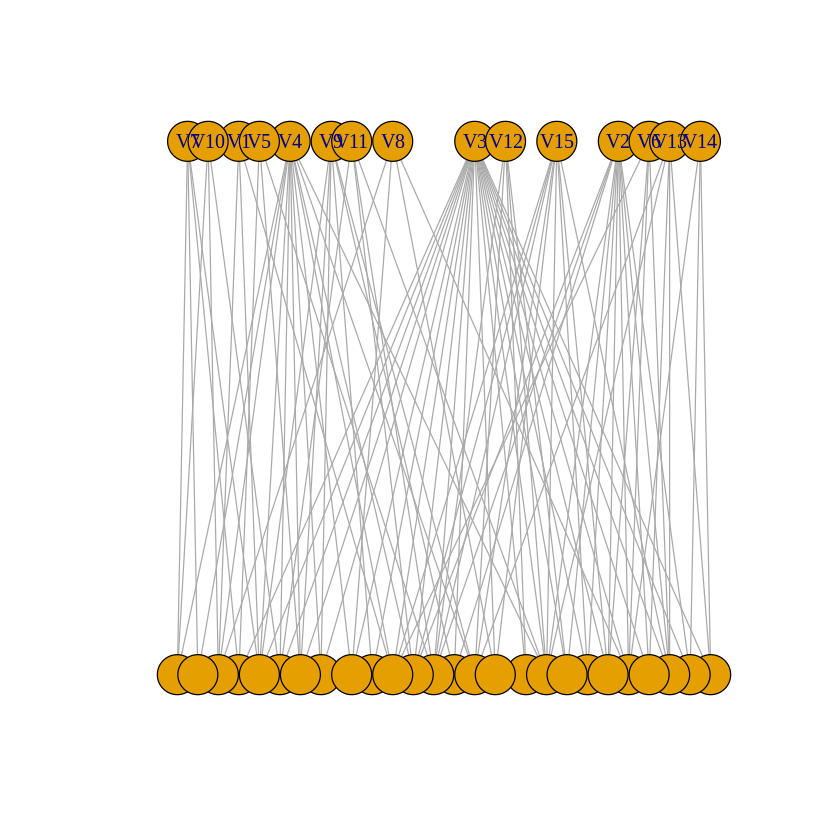

In [ ]:
  high <-cbind(matrix(0,nrow = nrow(inc_matrix),ncol = nrow(inc_matrix)), inc_matrix)
  low <-cbind(t(inc_matrix), matrix(0,nrow = ncol(inc_matrix), ncol = ncol(inc_matrix)))
  cur_ceo <- rbind(high,low)
  type_mask <-sapply(1:(nrow(inc_matrix) + ncol(inc_matrix)), function(l) if (l <= nrow(inc_matrix)) TRUE else FALSE)
  double_graph <-graph.adjacency(cur_ceo, mode = "undirected")
  V(double_graph)$type <-type_mask
  

  l_bipart <-layout_as_bipartite(double_graph,V(double_graph)$type)
  plot.igraph(double_graph, layout= l_bipart,rescale = T)


7) Представить сеть аффилированности в виде двух одномодальных
сетей: сеть соучастия и сеть перекрытия событий. Представить полученные сети в виде ценностных матриц и взвешенных графов.
Сделать выводы.

Соучастие: 


      [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13]
 [1,]    3    1    1    1    1    1    2    1    1     2     2     1     3
 [2,]    1    3    1    1    1    1    1    1    0     1     1     1     2
 [3,]    1    1    2    1    1    1    1    0    0     1     1     0     1
 [4,]    1    1    1    3    1    2    1    0    0     1     2     0     1
 [5,]    1    1    1    1    3    2    1    0    0     1     1     0     1
 [6,]    1    1    1    2    2    3    1    0    0     1     2     0     1
 [7,]    2    1    1    1    1    1    4    2    2     1     1     1     2
 [8,]    1    1    0    0    0    0    2    3    2     0     0     2     1
 [9,]    1    0    0    0    0    0    2    2    4     0     0     1     1
[10,]    2    1    1    1    1    1    1    0    0     2     2     0     2
[11,]    2    1    1    2    1    2    1    0    0     2     3     0     2
[12,]    1    1    0    0    0    0    1    2    1     0     0     2     1
[13,]    3    2    1    1

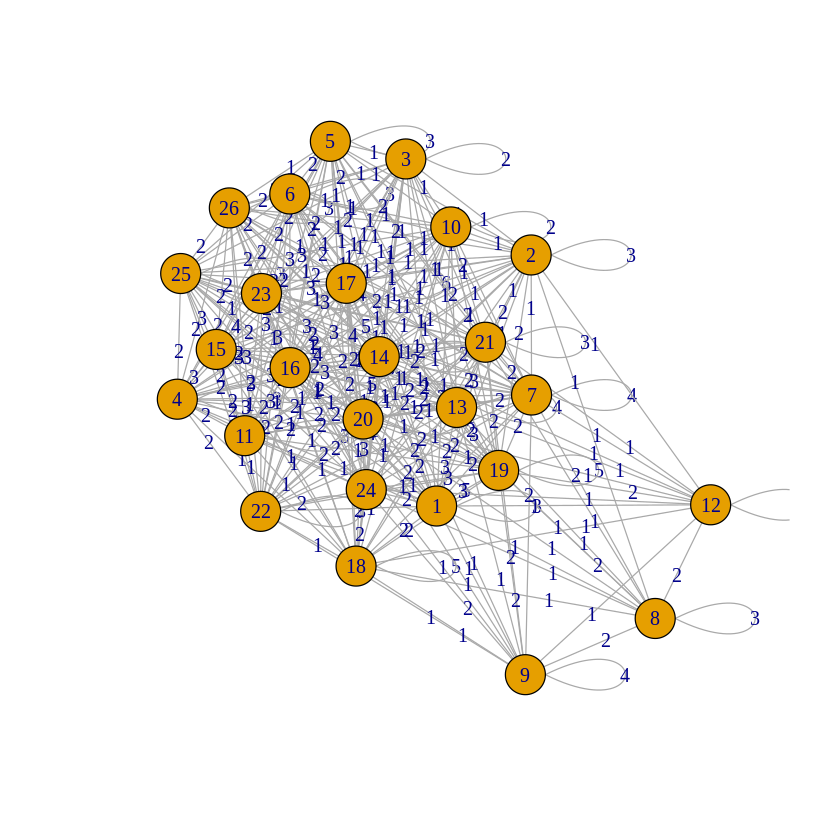

In [ ]:
participation_matrix <- inc_matrix %*% t(inc_matrix)
participation_graph <-graph.adjacency(participation_matrix,weighted = TRUE,mode = "undirected")
plot(participation_graph, edge.label = E(participation_graph)$weight)
print(participation_matrix)

Перекрытие событий:


    V1 V2 V3 V4 V5 V6 V7 V8 V9 V10 V11 V12 V13 V14 V15
V1   3  0  2  3  0  1  1  1  1   1   0   0   0   0   1
V2   0 11 11  2  1  3  0  1  1   0   3   3   3   2   6
V3   2 11 22  8  3  4  2  3  5   1   4   4   4   3   8
V4   3  2  8 12  1  1  3  2  4   3   3   2   2   0   4
V5   0  1  3  1  3  0  1  0  1   0   1   1   0   0   1
V6   1  3  4  1  0  4  0  1  0   0   0   0   1   1   3
V7   1  0  2  3  1  0  4  0  1   1   0   0   0   0   0
V8   1  1  3  2  0  1  0  4  0   1   0   0   0   1   1
V9   1  1  5  4  1  0  1  0  6   0   0   1   1   0   1
V10  1  0  1  3  0  0  1  1  0   3   1   0   0   0   0
V11  0  3  4  3  1  0  0  0  0   1   4   2   1   0   3
V12  0  3  4  2  1  0  0  0  1   0   2   5   2   0   3
V13  0  3  4  2  0  1  0  0  1   0   1   2   5   1   3
V14  0  2  3  0  0  1  0  1  0   0   0   0   1   3   0
V15  1  6  8  4  1  3  0  1  1   0   3   3   3   0   9


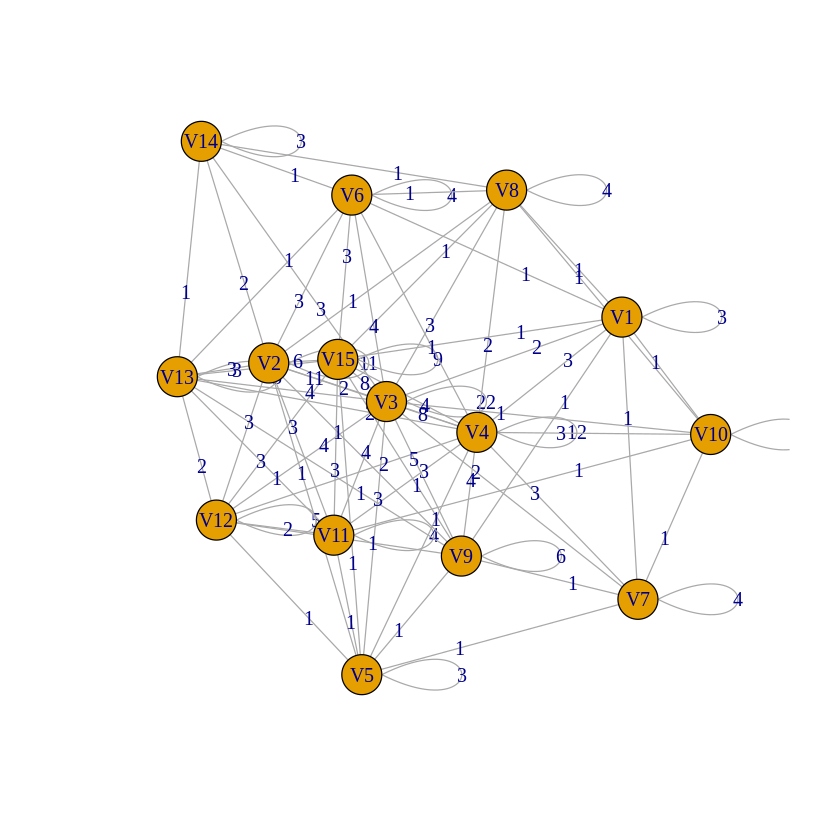

In [ ]:
overlap_matrix <- t(inc_matrix) %*% inc_matrix
overlap_graph <- graph.adjacency(overlap_matrix, weighted = TRUE, mode = "undirected")
plot(overlap_graph, edge.label = E(overlap_graph)$weight)
print(overlap_matrix)


Выводы: были получены корректные результаты, можно заметить, что в центре графов находятся вершины с наибольшими весами между собой и имеющие наибольшее количество связей. Таким образом можно наглядно определить наиболее часто участвующие акторы и перекрывающиеся события.

8) Вычислить степень участия для каждого актора, а также среднее количество событий, с которыми актор аффилирован. Сделать выводы.


In [ ]:
participation_deg <- diag(participation_matrix)
names(participation_deg) <- sapply(1:length(participation_deg), function(l) paste("актор",l,sep = " "))
participation_avg <- mean(participation_deg)
print(list(Uchastie = participation_deg, NormirovannoeUchastie = participation_avg))

$Uchastie
 актор 1  актор 2  актор 3  актор 4  актор 5  актор 6  актор 7  актор 8 
       3        3        2        3        3        3        4        3 
 актор 9 актор 10 актор 11 актор 12 актор 13 актор 14 актор 15 актор 16 
       4        2        3        2        4        7        5        5 
актор 17 актор 18 актор 19 актор 20 актор 21 актор 22 актор 23 актор 24 
       6        5        5        5        3        3        4        5 
актор 25 актор 26 
       3        3 

$NormirovannoeUchastie
[1] 3.769231



Выводы: актор в среднем аффилирован с 3.7 событиями, а разброс значений от актора к актору слабо отличается. При учёте того, что событий у нас 15, можно сказать, что акторы имеют маленькое среднее число событий, с которыми аффилированы.



9) Вычислить размер и средний размер для каждого события. Сделать выводы.

In [ ]:
overlap_size <- diag(overlap_matrix)
names(overlap_size) <-sapply(1:length(overlap_size), function(l) paste("событие",l,sep= " ") )
overlap_size_norm <- mean(overlap_size)
print(list(Size = overlap_size, NormSize = overlap_size_norm))

$Size
 событие 1  событие 2  событие 3  событие 4  событие 5  событие 6  событие 7 
         3         11         22         12          3          4          4 
 событие 8  событие 9 событие 10 событие 11 событие 12 событие 13 событие 14 
         4          6          3          4          5          5          3 
событие 15 
         9 

$NormSize
[1] 6.533333



Выводы: события имеют не слишком большой средний размер, но при этом имеют очень большой разброс значений, следовательно сущетсвуют несколько очень больших событий, по сравнению с остальными.


10) Вычислить плотность для соотношения соучастия и отношения перекрытия. Проинтерпретируйте полученные значения.


In [ ]:
n <- nrow(participation_matrix)
m <-nrow(overlap_matrix)
participation_plotn <- (sum(participation_matrix)-sum(participation_deg))/(n*(n-1))
overlap_plotn <- (sum(overlap_matrix)-sum(overlap_size))/(m*(m-1))
print(list("Cоучастие" = participation_plotn, "Перекрытие" = overlap_plotn))

$Cоучастие
[1] 1.412308

$Перекрытие
[1] 1.485714



Выводы: маленькая относительно своих максимальных значений плотность, говорит нам о том же, о чем предыдущие выводы. Средние значения соучастия и перекрытий довольно незначительны.


11) Определить диаметр сети аффилированности

In [ ]:
diameter(double_graph)

[1] 5

12) Определить клики уровня 𝑐 = {4, 3} для отношения соучастия и
клики уровня 𝑐 = {6, 5, 4, 3, 2} для отношения перекрытия событий.
Сделать выводы.


Соучастие: 

In [ ]:
clique_from_net <- function (matrix, level){
  tmp_graph <-graph.adjacency(matrix,weighted = TRUE,mode = "undirected")
  tmp_graph <- delete_edges(tmp_graph,E(tmp_graph)[E(tmp_graph)$weight < level])
  return (cliques(tmp_graph,min = 3))
}

c_cliques_by_level <- function (matrix,levels){
  new_cliqs <- list()
  for(i in levels){
    new_list <- clique_from_net(matrix,i)
    names(new_list) <- rep(paste(i,"клика",sep =" уровня "), length(new_list))
    new_cliqs <- c(new_cliqs,new_list)
  }
  return (new_cliqs)
  
}

levels <- c(3,4)

print(c_cliques_by_level(participation_matrix,levels))

$`3 уровня клика`
+ 3/26 vertices, from e29d6f0:
[1] 14 20 23

$`3 уровня клика`
+ 3/26 vertices, from e29d6f0:
[1]  7 14 20

$`3 уровня клика`
+ 3/26 vertices, from e29d6f0:
[1]  1 13 19

$`3 уровня клика`
+ 3/26 vertices, from e29d6f0:
[1] 15 20 23

$`3 уровня клика`
+ 4/26 vertices, from e29d6f0:
[1] 14 15 20 23

$`3 уровня клика`
+ 3/26 vertices, from e29d6f0:
[1] 15 16 23

$`3 уровня клика`
+ 3/26 vertices, from e29d6f0:
[1] 14 15 23

$`3 уровня клика`
+ 3/26 vertices, from e29d6f0:
[1] 14 15 25

$`3 уровня клика`
+ 3/26 vertices, from e29d6f0:
[1] 14 15 20

$`3 уровня клика`
+ 3/26 vertices, from e29d6f0:
[1] 15 17 23

$`3 уровня клика`
+ 4/26 vertices, from e29d6f0:
[1] 15 17 20 23

$`3 уровня клика`
+ 5/26 vertices, from e29d6f0:
[1] 14 15 17 20 23

$`3 уровня клика`
+ 4/26 vertices, from e29d6f0:
[1] 14 15 17 23

$`3 уровня клика`
+ 3/26 vertices, from e29d6f0:
[1] 15 17 20

$`3 уровня клика`
+ 4/26 vertices, from e29d6f0:
[1] 14 15 17 20

$`3 уровня клика`
+ 3/26 vertices, fr

Перекрытия: 


In [ ]:
levels <-c(2,3,4,5,6)
print(c_cliques_by_level(overlap_matrix,levels))

$`2 уровня клика`
+ 3/15 vertices, named, from 515f807:
[1] V3  V6  V15

$`2 уровня клика`
+ 3/15 vertices, named, from 515f807:
[1] V3  V4  V15

$`2 уровня клика`
+ 3/15 vertices, named, from 515f807:
[1] V3 V4 V9

$`2 уровня клика`
+ 3/15 vertices, named, from 515f807:
[1] V3 V4 V8

$`2 уровня клика`
+ 3/15 vertices, named, from 515f807:
[1] V3 V4 V7

$`2 уровня клика`
+ 3/15 vertices, named, from 515f807:
[1] V1 V3 V4

$`2 уровня клика`
+ 3/15 vertices, named, from 515f807:
[1] V4  V12 V15

$`2 уровня клика`
+ 4/15 vertices, named, from 515f807:
[1] V3  V4  V12 V15

$`2 уровня клика`
+ 3/15 vertices, named, from 515f807:
[1] V3  V12 V15

$`2 уровня клика`
+ 3/15 vertices, named, from 515f807:
[1] V3  V4  V12

$`2 уровня клика`
+ 3/15 vertices, named, from 515f807:
[1] V2  V12 V15

$`2 уровня клика`
+ 4/15 vertices, named, from 515f807:
[1] V2  V4  V12 V15

$`2 уровня клика`
+ 5/15 vertices, named, from 515f807:
[1] V2  V3  V4  V12 V15

$`2 уровня клика`
+ 4/15 vertices, named, from 

Выводы: были получены корректные результаты


13) Для каждых пар событий определить отношение шансов. Сделать выводы

In [ ]:
kl <- t(inc_matrix) %*% inc_matrix
nkl <- (1-t(inc_matrix))%*%(1-inc_matrix)
nk_l <- (1-t(inc_matrix))%*%inc_matrix
knl <- t(inc_matrix)%*%(1-inc_matrix)

chances <- c()
for(i in 2:nrow(kl)){
  for(j in 1:(i-1)){
    name <- paste(i,j,sep=":")
    pos <- (kl[i,j]*nkl[i,j])/(nk_l[i,j]*knl[i,j])
    chances[name] <-pos
  }
}


print(chances)

       2:1        3:1        3:2        4:1        4:2        4:3        5:1 
0.00000000 0.30000000        Inf        Inf 0.11111111 0.00000000 0.00000000 
       5:2        5:3        5:4        6:1        6:2        6:3        6:4 
0.65000000        Inf 0.54545455 3.33333333 5.25000000        Inf 0.33333333 
       6:5        7:1        7:2        7:3        7:4        7:5        7:6 
0.00000000 3.33333333 0.00000000 0.10000000 4.33333333 3.33333333 0.00000000 
       8:1        8:2        8:3        8:4        8:5        8:6        8:7 
3.33333333 0.40000000 0.47368421 1.20000000 0.00000000 2.11111111 0.00000000 
       9:1        9:2        9:3        9:4        9:5        9:6        9:7 
1.80000000 0.20000000 0.88235294 3.00000000 1.80000000 0.00000000 1.13333333 
       9:8       10:1       10:2       10:3       10:4       10:5       10:6 
0.00000000 5.25000000 0.00000000 0.04761905        Inf 0.00000000 0.00000000 
      10:7       10:8       10:9       11:1       11:2       11:

Выводы: были получены корректные результаты, также можно заметить в некоторых ячейках значения 0 и inf, то есть бесконечность. Говоря об отношении шансов между событиями, это значит, что в случае с 0 мы не можем побывать сразу в 2, а в случае с бесконечностью, что мы всего побываем во втором, если побывали в первом, и наоборот.

## Выводы

Были получены навыки работы с математическими пакетами для исследования подгрупп в социальных сетях, а также моделирования, отображения
и анализа сетей аффилированности.